## Лабораторная работа № 4

### Задание № 3

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from math import cos, sin, pi

In [2]:
# Чтение таблицы x - f(x) из файла

xArr = np.zeros((10), dtype = float)
yArr = np.zeros((10), dtype = float)
new_xArr = np.zeros((100), dtype = float)

openFile = np.loadtxt("data.csv")
for i in range(10):
    xArr[i] = i * 2 * pi / 10
    yArr[i] = openFile[i + 220][1]

for i in range(100):
    new_xArr[i] = i * 2 * pi / 100
    
print (xArr)
print (yArr)
print (new_xArr)

[ 0.          0.62831853  1.25663706  1.88495559  2.51327412  3.14159265
  3.76991118  4.39822972  5.02654825  5.65486678]
[ -4.60000000e-04   3.09544000e-01   5.91083000e-01   8.16324000e-01
   9.62789000e-01   1.01560500e+00   9.69005000e-01   8.26959000e-01
   6.02835000e-01   3.18152000e-01]
[ 0.          0.06283185  0.12566371  0.18849556  0.25132741  0.31415927
  0.37699112  0.43982297  0.50265482  0.56548668  0.62831853  0.69115038
  0.75398224  0.81681409  0.87964594  0.9424778   1.00530965  1.0681415
  1.13097336  1.19380521  1.25663706  1.31946891  1.38230077  1.44513262
  1.50796447  1.57079633  1.63362818  1.69646003  1.75929189  1.82212374
  1.88495559  1.94778745  2.0106193   2.07345115  2.136283    2.19911486
  2.26194671  2.32477856  2.38761042  2.45044227  2.51327412  2.57610598
  2.63893783  2.70176968  2.76460154  2.82743339  2.89026524  2.95309709
  3.01592895  3.0787608   3.14159265  3.20442451  3.26725636  3.33008821
  3.39292007  3.45575192  3.51858377  3.5814156

In [3]:
def getA0(yArr):
    a0 = 0
    for i in range(10):
        a0 -= yArr[i] / 10
    return a0

In [4]:
def getAk(power, yArr):
    ak = np.zeros((power + 1), dtype = float)
    for k in range(power + 1):
        s = 0
        for i in range(10):
            s += yArr[i] * cos(k * 2 * pi * i / 10)
        ak[k] = (2 / 10) * s
    return ak

In [5]:
def getBk(power, yArr):
    bk = np.zeros((power + 1), dtype = float)
    for k in range(power + 1):
        s = 0
        for i in range(10):
            s += yArr[i] * sin(k * 2 * pi * i / 10)
        bk[k] = (2 / 10) * s    
    return bk

In [6]:
def getFourier(power, xArr, yArr):
    polinom = np.zeros((100), dtype = float)
    a0 = getA0(yArr)
    ak = getAk(power, yArr)
    bk = getBk(power, yArr)
    for i in range(100):
        polinom[i] = a0
        for j in range(power + 1):
            polinom[i] += ak[j] * cos((j) * xArr[i]) + bk[j] * sin((j) * xArr[i])
    return polinom

In [13]:
Fourier = getFourier(4, new_xArr, yArr)
print (Fourier)

[ 0.0156732   0.01882173  0.02915996  0.04634594  0.06982512  0.09885736
  0.13255277  0.16991421  0.20988424  0.25139394  0.2934108   0.33498337
  0.37528009  0.41362046  0.44949697  0.48258692  0.5127537   0.54003781
  0.56463852  0.58688748  0.6072162   0.62611935  0.64411645  0.66171411
  0.67937115  0.69746868  0.71628674  0.73598863  0.75661388  0.77807972
  0.8001908   0.82265622  0.84511249  0.86715067  0.88834592  0.90828714
  0.92660494  0.94299598  0.9572421   0.96922306  0.9789222   0.98642464
  0.99190843  0.99562926  0.99789996  0.99906618  0.99948018  0.99947438
  0.99933668  0.99928917  0.9994718   0.99993206  1.00062145  1.00139896
  1.00204127  1.00225909  1.00171836  1.00006496  0.99695108  0.99206156
  0.9851382   0.9760003   0.96456005  0.9508315   0.93493239  0.91707859
  0.89757145  0.8767787   0.85511014  0.83298971  0.8108258   0.78898166
  0.76774821  0.74732096  0.7277829   0.70909465  0.69109287  0.67349722
  0.65592591  0.63791897  0.6189682   0.59855199  0

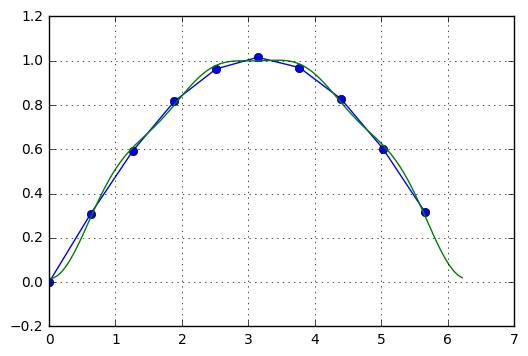

In [14]:
fig = plt.figure()
axes = fig.add_subplot(111)
axes.grid()
axes.plot(xArr, yArr, 'o-', new_xArr, Fourier)
plt.show()